# Tomography/Laminography Reconstruction

This notebook demonstrates a simulated tomography/laminography reconstruction using tike. Since laminography is just a specific case of tomography, one example should be sufficient.

In [ ]:
import logging
import lzma
import pickle

import matplotlib.pyplot as plt
import numpy as np

import tike.lamino
import tike.view

In [2]:
for module in [tike, np]:
    print("{} is version {}".format(module.__name__, module.__version__))

tike is version 0.25.1.dev4+gdf3f9c5
numpy is version 1.26.0


## Create test data

### Define the object

In [3]:
with lzma.open('../../../tests/data/nalm256.pickle.lzma', 'rb') as file:
    original = pickle.load(file)[::2, ::2, ::2].astype('complex64')
original.shape

(128, 128, 128)

In [4]:
# Mark object to make it asymmetric
original[20:25, 60:64, 20:25] = 0.001

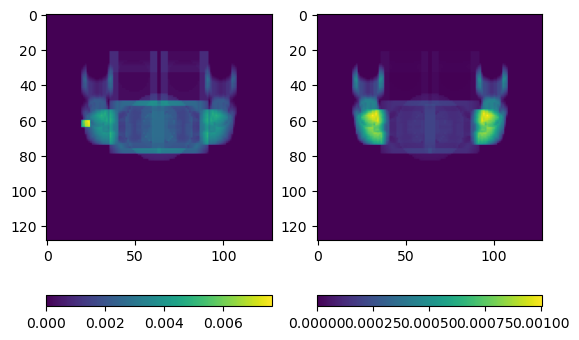

In [5]:
plt.figure()
tike.view.plot_complex(np.sum(original, axis=0))
plt.show()

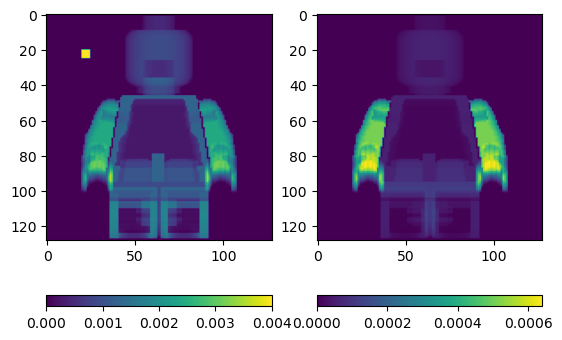

In [6]:
plt.figure()
tike.view.plot_complex(np.sum(original, axis=1))
plt.show()

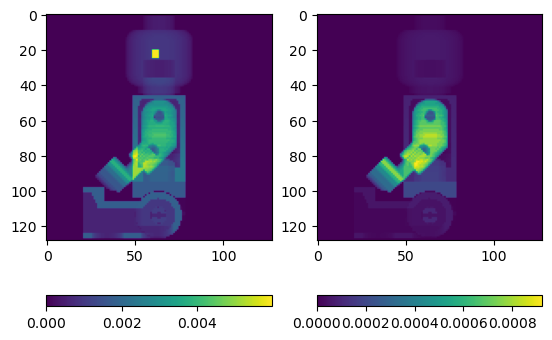

In [7]:
plt.figure()
tike.view.plot_complex(np.sum(original, axis=2))
plt.show()

### Define trajectory

In [8]:
theta = np.linspace(0, np.pi, 128, endpoint=False, dtype='float32')
theta.shape

(128,)

## Simulate data acquisition

In [9]:
tilt=np.pi/2
data = tike.lamino.simulate(obj=original, theta=theta, tilt=tilt)

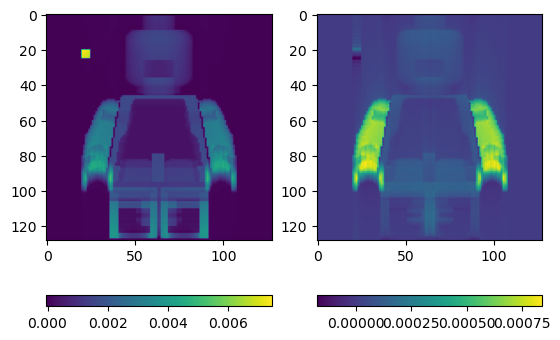

In [10]:
plt.figure()
tike.view.plot_complex(data[0])
plt.show()

## Reconstruct the data

In [11]:
logging.basicConfig(level=logging.INFO)
result = {
    'obj': np.zeros(original.shape, dtype='complex64')
}

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.


INFO:tike.lamino.solvers.cgrad:    object cost is +1.23785e+00
INFO:tike.lamino.solvers.cgrad:    object cost is +4.39388e-01
INFO:tike.lamino.solvers.cgrad:    object cost is +2.49012e-01
INFO:tike.lamino.solvers.cgrad:    object cost is +1.69864e-01


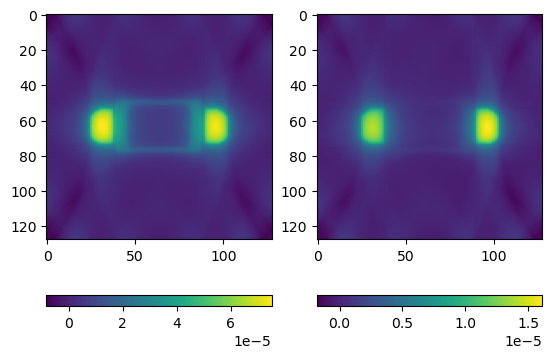

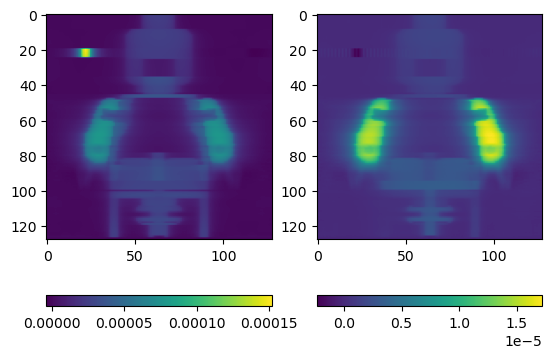

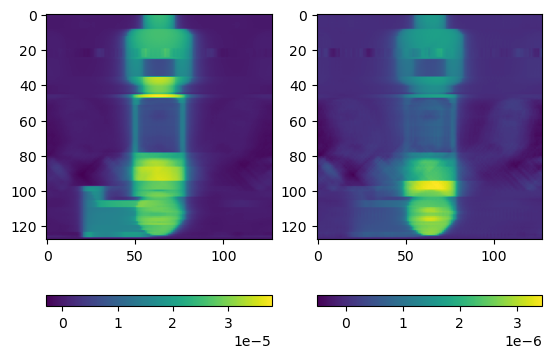

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.lamino.solvers.cgrad:    object cost is +1.26124e-01
INFO:tike.lamino.solvers.cgrad:    object cost is +9.24444e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +7.34730e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +5.97756e-02


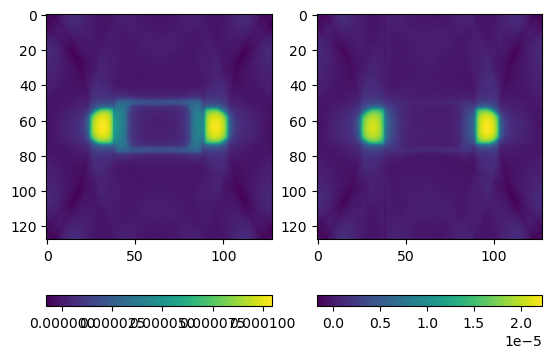

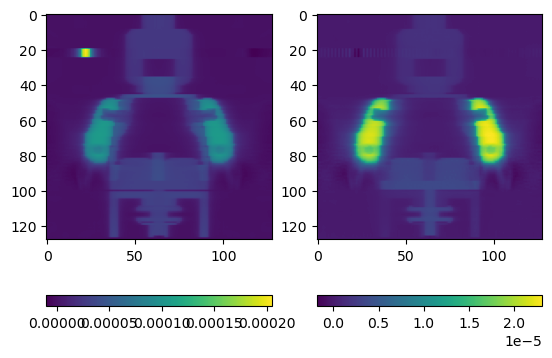

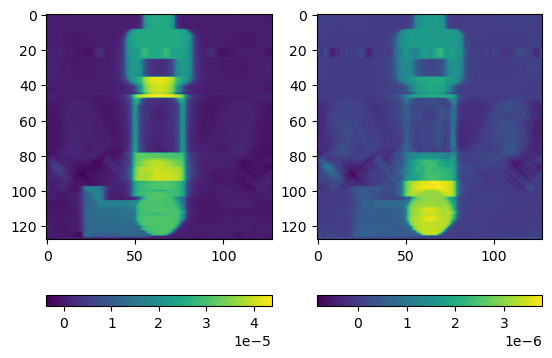

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.lamino.solvers.cgrad:    object cost is +4.99955e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +4.41047e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +3.77018e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +3.25627e-02


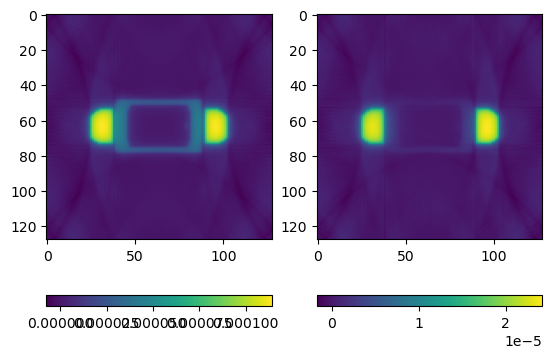

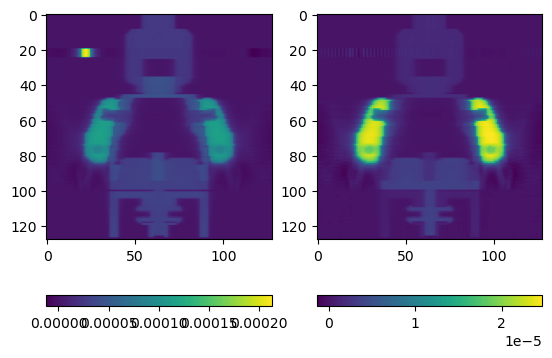

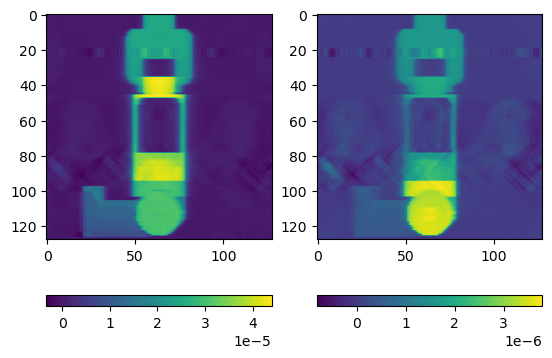

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.lamino.solvers.cgrad:    object cost is +2.88834e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +2.53497e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +2.32283e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +2.01117e-02


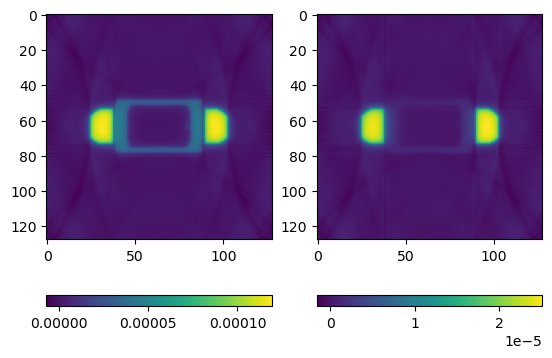

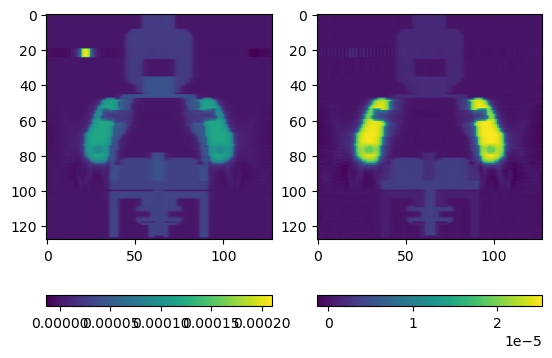

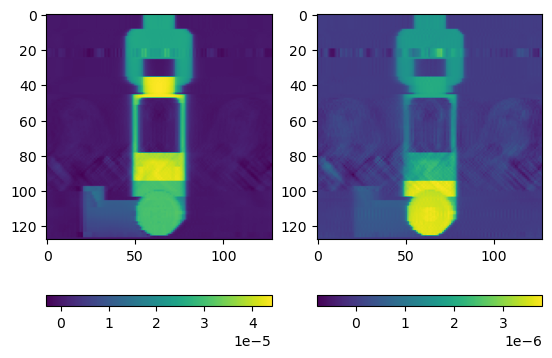

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.lamino.solvers.cgrad:    object cost is +1.75994e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +1.61807e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +1.46181e-02
INFO:tike.lamino.solvers.cgrad:    object cost is +1.32219e-02


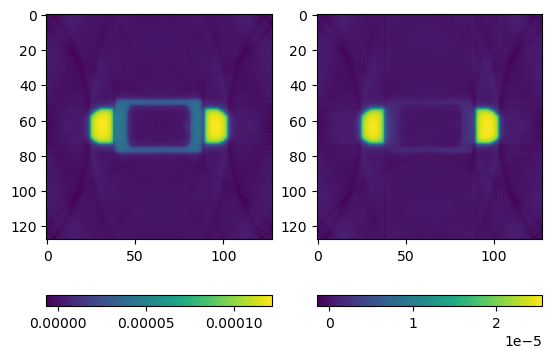

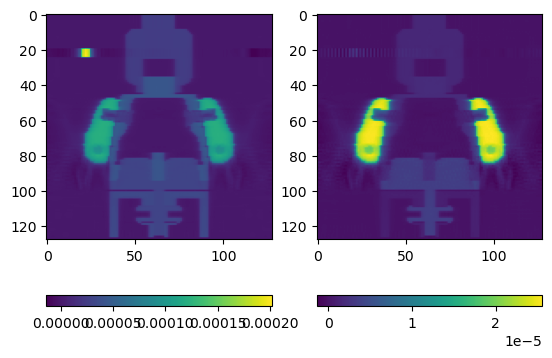

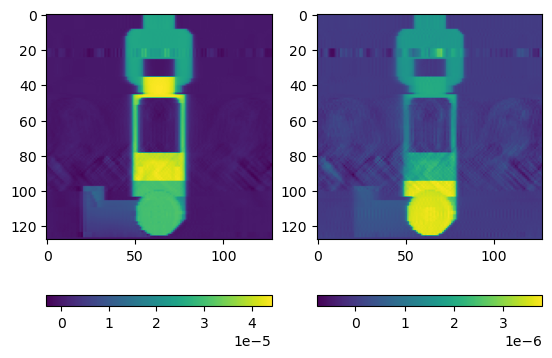

In [12]:
for i in range(5):
    result = tike.lamino.reconstruct(
        **result,
        theta=theta,
        data=data,
        algorithm='cgrad',
        num_iter=4,
        tilt=tilt,
    )
    plt.figure()
    tike.view.plot_complex(result['obj'][64])
    plt.show()
    plt.figure()
    tike.view.plot_complex(result['obj'][:, 64])
    plt.show()
    plt.figure()
    tike.view.plot_complex(result['obj'][:, :, 64])
    plt.show()